# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Dataset

In [3]:
dataset = pd.read_csv('50_Startups.csv')
# dataset = pd.get_dummies(dataset)
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Split Features and Targets
## Also split training and test samples

In [4]:
X,y = dataset.iloc[:,0:4], dataset.iloc[:,-1].values
# Convert Categorical Data into 0,1,2...
X = pd.get_dummies(X).values
X = X[:,:-1]
#There are zeros in first and last column of X features
mean1, mean2 = X[:,0].mean(), X[:,-1].mean()
X[:,0] = np.where(X[:,0]==0.0, mean1, X[:,0])
X[:,-1] = np.where(X[:,-1] == 0.0, mean2, X[:,-1])

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

# Features Scaling

In [77]:
X[:,0],X[:,1],X[:,2] = X[:,0]/X[:,0].max(), X[:,1]/X[:,1].max(), X[:,2]/X[:,2].max()

## Split training and test samples

In [78]:
# Training and Testing Samples
X_train,X_test = X[0:40, :],X[40:51, :]
y_train, y_test = y[0:40],y[40:51]

# Model Implementation

In [79]:
class MultipleRegression():
    def __init__(self, lr = 0.001, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        cost = []
        it = []
        for i in range(self.epochs):
            y_pred = np.dot(X,self.weights) + self.bias
            cost.append(np.sum((y_pred-y)**2))
            it.append(i+1)
            dw = 1 / (n_samples) * np.dot(X.T,(y_pred-y))
            db = 1 / (n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
        plt.plot(it,cost,color = 'b')
    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred

# Model Training

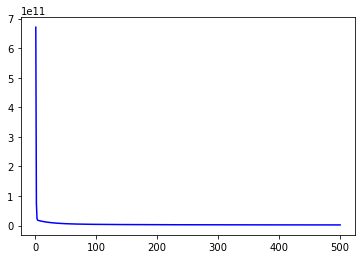

In [80]:
regressor = MultipleRegression(lr = 0.29,epochs = 500)
regressor.fit(X_train,y_train)

# Model Predictions

In [81]:
y_pred = regressor.predict(X_test)
cost = (1/10)*(np.sum((y_pred-y_test)**2))
print(cost)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1332776004.288227
[[ 81796.06  78239.91]
 [ 77777.66  77798.83]
 [ 76592.14  71498.49]
 [ 61577.08  69758.98]
 [ 70594.36  65200.33]
 [ 49590.55  64926.08]
 [ 65989.71  49490.75]
 [105401.65  42559.73]
 [ 48010.5   35673.41]
 [107333.57  14681.4 ]]
